Using 20000 images for training and testing.
Using device cuda
Number of parameters in the model: 1563929
Searching for jpg files in directory: data/Fire_Detection.v1.coco/train/
Found 8939 jpg files in directory: data/Fire_Detection.v1.coco/train/
Number of fire images: 8939
Number of no fire images: 8939
Searching for jpg files in directory: data/data_256
Found 1803460 jpg files in directory: data/data_256
14302 samples used in training
1787 samples used in val
1789 samples used in test


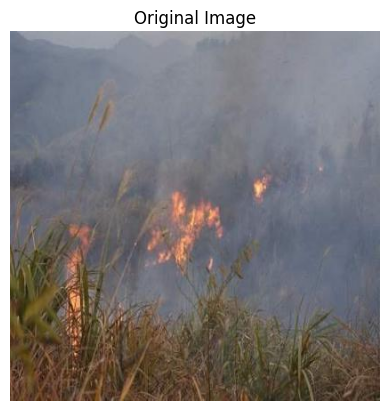

In [1]:

from train_cnn import TrainingModel, train_cnn, TRANSFORM, ModelWithTransform, get_image_data, visualize_loss_curve, visualize_layer_weights, TrainingParameters
import torch
import matplotlib.pyplot as plt
n_samples = 20000
MODEL_NAME = "final_exp"
output_file_path = f"{MODEL_NAME}.pth"

print(f"Using {n_samples} images for training and testing.")

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Using device {DEVICE}")
model = TrainingModel()

optim = torch.optim.Adam(model.parameters(), lr=1e-3)
training_params = TrainingParameters(
        optimizer=optim,
        loss_function=torch.nn.BCEWithLogitsLoss(), # Binary Classification Loss that automatically applies sigmoid
        batch_size=128,
        n_epochs=15,
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optim, mode='min', patience=5, factor=0.5), # reduce learning reate by half if no improvement in 5 epochs
        early_stopping_threshold=1e-5,
        device = DEVICE
    )

# resize to 224x224 as preprocessing step
model_and_transform = ModelWithTransform(model, TRANSFORM)

train,val,test = get_image_data(n_samples)

print(f"{len(train)} samples used in training")
print(f"{len(val)} samples used in val")
print(f"{len(test)} samples used in test")


random_fire_img = None
for i in range(0, len(train)):
    if train[i][1]:
        random_fire_img = train[i][0]
        break

if random_fire_img is None:
    raise ValueError("No fire image found in the training set.")


# show original image
plt.imshow(random_fire_img.squeeze(0).permute(1, 2, 0).numpy())
plt.axis('off')
plt.title("Original Image")
plt.show()

random_fire_img = TRANSFORM(random_fire_img)




In [2]:
from data_extraction import save_image_data

train_loss, val_loss ,fire_detector = train_cnn(model_and_transform,training_params,train, val)
# Save the trained model to a file
fire_detector.save_to_file(output_file_path)
print(f"Model saved to {output_file_path}")

save_image_data(val, f"{MODEL_NAME}_val")
save_image_data(test, f"{MODEL_NAME}_test")


Begin training...
Epoch 1 completed. Train loss: 0.5453, Validation loss: 0.5128
Epoch 2 completed. Train loss: 0.4146, Validation loss: 0.3940
Epoch 3 completed. Train loss: 0.3601, Validation loss: 0.3855
Epoch 4 completed. Train loss: 0.3273, Validation loss: 0.3166
Epoch 5 completed. Train loss: 0.3056, Validation loss: 0.3313
Epoch 6 completed. Train loss: 0.2796, Validation loss: 0.3396
Epoch 7 completed. Train loss: 0.2511, Validation loss: 0.3252
Epoch 8 completed. Train loss: 0.2471, Validation loss: 0.2993
Epoch 9 completed. Train loss: 0.2248, Validation loss: 0.2807
Epoch 10 completed. Train loss: 0.2124, Validation loss: 0.2746
Epoch 11 completed. Train loss: 0.2075, Validation loss: 0.2653
Epoch 12 completed. Train loss: 0.1893, Validation loss: 0.2916
Epoch 13 completed. Train loss: 0.1773, Validation loss: 0.2693
Epoch 14 completed. Train loss: 0.1690, Validation loss: 0.2993
Epoch 15 completed. Train loss: 0.1516, Validation loss: 0.3023
Model saved to test_model2.pth


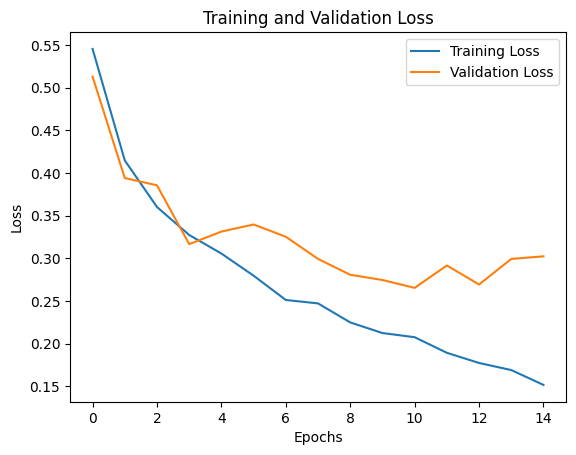

In [3]:
visualize_loss_curve(train_loss, val_loss)



Filters shape:  torch.Size([16, 3, 5, 5])
torch.Size([16, 3, 5, 5])


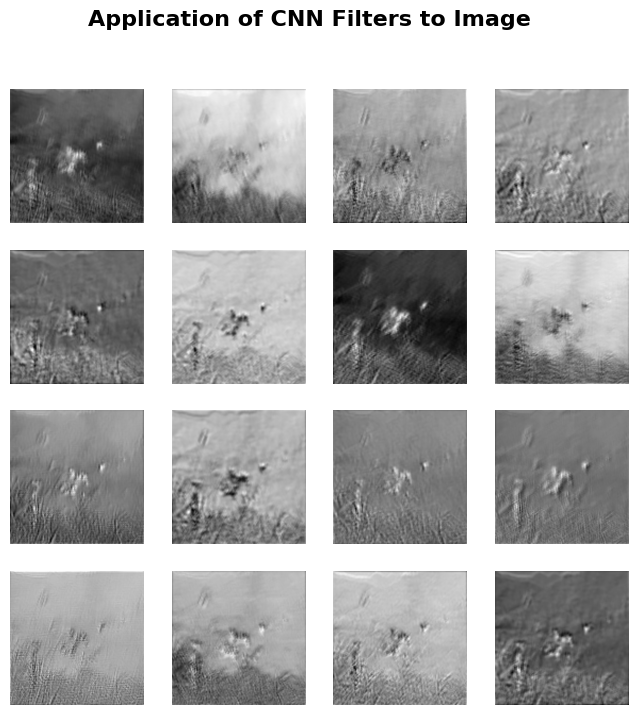

In [4]:
visualize_layer_weights(fire_detector.model.trained_model.convolutional_layers[0], random_fire_img)


In [5]:
# TODO: save test tensors to tensor_cahce and run inferneceo ntehm  to test recall/fpr on unseen image data
# use VAL images to get decision threshold